# analysis of timeseries bins

context: Each row in the CSV is a slice of time. Two columns in the CSV contain start time and end time for each row

My task was to ensure there were no anomalies in the start/end bins. This notebook previews only 3 CSVs. The original data set has about 6000 CSVs.

In [1]:
import pandas
import matplotlib.pyplot as plt
import numpy

In the original dataset there were about 6000 CSVs. I decided to start by inspecting a single CSV

In [2]:
df_0007 = pandas.read_csv('datasets/med_timestamp_bins/ECGV0007_fullresults_time.csv')
df_0007.shape

(93, 5)

In [3]:
df_0007.columns

Index(['CaseName', '   TimeFromBEGIN_Sec ', ' TimeFromEND_Sec ',
       ' DuringOrClosestTo', ' hourinday '],
      dtype='object')

In [4]:
df_0007.head()

,CaseName,TimeFromBEGIN_Sec,TimeFromEND_Sec,DuringOrClosestTo,hourinday
0,ECGV0007,-1680.0,-1380.0,0.0,22.0
1,ECGV0007,-1380.0,-1080.0,0.0,22.1
2,ECGV0007,-1080.0,-780.0,0.0,22.2
3,ECGV0007,-780.0,-480.0,0.0,22.3
4,ECGV0007,-480.0,-180.0,0.0,22.4


In [5]:
df_0007.tail()

,CaseName,TimeFromBEGIN_Sec,TimeFromEND_Sec,DuringOrClosestTo,hourinday
88,ECGV0007,24700.0,25000.0,0.0,5.38
89,ECGV0007,25000.0,25300.0,0.0,5.46
90,ECGV0007,25300.0,25600.0,0.0,5.54
91,ECGV0007,25600.0,25900.0,0.0,5.63
92,ECGV0007,25900.0,26200.0,0.0,5.71


As a check of this data, the "DuringOrClosestTo" column should have a single row with value 1; all others should be zero

In [6]:
df_0007[' DuringOrClosestTo'].sum()

1.0

As a check of the time columns, all entries should be unique:

In [7]:
df_0007.nunique()

CaseName                  1
   TimeFromBEGIN_Sec     93
 TimeFromEND_Sec         93
 DuringOrClosestTo        2
 hourinday               90
dtype: int64

We expect the time bins to be ordered and to increment

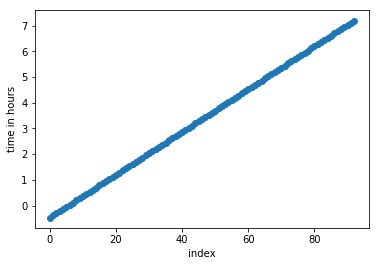

In [8]:
_=plt.scatter(df_0007['   TimeFromBEGIN_Sec '].index,
              df_0007['   TimeFromBEGIN_Sec ']/60/60)
_=plt.xlabel('index')
#_=plt.ylabel('time in seconds')
_=plt.ylabel('time in hours')

The bins are sequentially ordered, so we can check for outliers in bin width

In [9]:
df_0007['difference in seconds']=df_0007[' TimeFromEND_Sec ']-df_0007['   TimeFromBEGIN_Sec ']

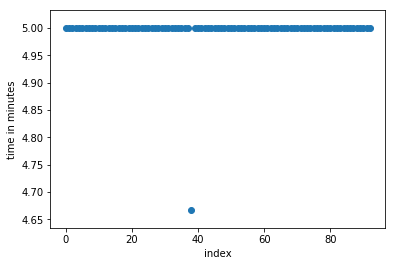

In [10]:
_=plt.scatter(df_0007['difference in seconds'].index,
              df_0007['difference in seconds']/60)
_=plt.xlabel('index')
_=plt.ylabel('time in minutes')

By visual inspection of the above figure, we can see there is an outlier!

Which row contains the outlier?

In [11]:
df_0007[df_0007['difference in seconds']<(5*60)]

,CaseName,TimeFromBEGIN_Sec,TimeFromEND_Sec,DuringOrClosestTo,hourinday,difference in seconds
38,ECGV0007,9720.0,10000.0,0.0,1.21,280.0


This row is 20 seconds under the expected 5 minute bin width. 

Does the duration of that bin mean there's a gap?

We can look at the adjacent rows

In [12]:
df_0007.loc[37:39]

,CaseName,TimeFromBEGIN_Sec,TimeFromEND_Sec,DuringOrClosestTo,hourinday,difference in seconds
37,ECGV0007,9420.0,9720.0,0.0,1.13,300.0
38,ECGV0007,9720.0,10000.0,0.0,1.21,280.0
39,ECGV0007,10000.0,10300.0,0.0,1.29,300.0


The adjacent bins indicate no gap exists even though one of the rows is shorter than the others.

Are all bins contiguous? Or are there gaps?

In [13]:
begin_times = set(list(df_0007['   TimeFromBEGIN_Sec ']))
end_times   = set(list(df_0007[' TimeFromEND_Sec ']))
#numpy.setdiff1d(begin_times,end_times)

set_union = end_times.union(begin_times)
set_intersection = end_times.intersection(begin_times)
items_in_only_one_set = set_union-set_intersection
list(items_in_only_one_set)

[26200.0, -1680.0]

This isn't conclusive, but it's a quick test of bin continuity

# Repeat the above analysis for other CSVs

In [14]:
df_0045 = pandas.read_csv('datasets/med_timestamp_bins/ECGV0045_fullresults_time.csv')
df_0045.shape

(98, 5)

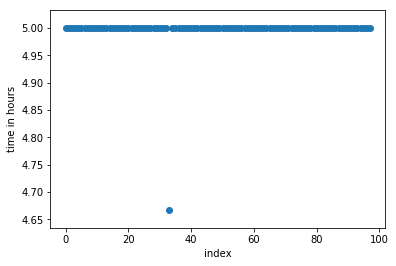

In [15]:
df_0045['difference in seconds']=df_0045[' TimeFromEND_Sec ']-df_0045['   TimeFromBEGIN_Sec ']

_=plt.scatter(df_0045['difference in seconds'].index,df_0045['difference in seconds']/60)
_=plt.xlabel('index')
_=plt.ylabel('time in hours')

In [17]:
df_0045[df_0045['difference in seconds']<(5*60)]

,CaseName,TimeFromBEGIN_Sec,TimeFromEND_Sec,DuringOrClosestTo,hourinday,difference in seconds
33,ECGV0045,9720.0,10000.0,0.0,0.0572,280.0


# and a third CSV

In [18]:
df_0153 = pandas.read_csv('datasets/med_timestamp_bins/ECGV0153_fullresults_time.csv')
df_0153.shape

(77, 5)

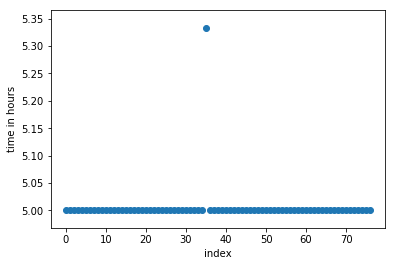

In [19]:
df_0153['difference in seconds']=df_0153[' TimeFromEND_Sec ']-df_0153['   TimeFromBEGIN_Sec ']

_=plt.scatter(df_0153['difference in seconds'].index,df_0153['difference in seconds']/60)
_=plt.xlabel('index')
_=plt.ylabel('time in hours')

In [20]:
df_0153[df_0153['difference in seconds']>(5*60)]

,CaseName,TimeFromBEGIN_Sec,TimeFromEND_Sec,DuringOrClosestTo,hourinday,difference in seconds
35,ECGV0153,9780.0,10100.0,0.0,0.175,320.0


# Summary:

We found that two of three CSVs have a single row with 20 seconds less than 5 minutes, and one CSV has a row with more than 20 seconds.

Based on this, the next two steps would be
1. investigate the full dataset, seeing if these problems exist in other CSVs
2. speak with the data owner to understand what is causing this issue